<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/Furniture_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

Mounted at /content/gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 5750, done.
remote: Total 5750 (delta 0), reused 0 (delta 0), pack-reused 5750
Receiving objects: 100% (5750/5750), 8.23 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (3934/3934), done.
/content/yolov5
     |████████████████████████████████| 645kB 16.5MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from glob import glob

val_imgg_list = glob('/content/gdrive/MyDrive/data/Furniture_image_data/Hive Modern/*.jpg')

val_img_path = val_imgg_list[0:10]
print(val_img_path)
for item in val_img_path:
  !python detect.py --weights yolov5s.pt --img 416 --conf 0.5 --source "{item}" --save-txt 

############## 1
# 1
53 371 1122 283


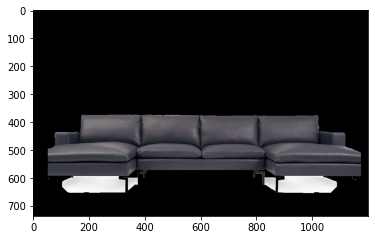

############## 2
# 1
46 217 1119 340


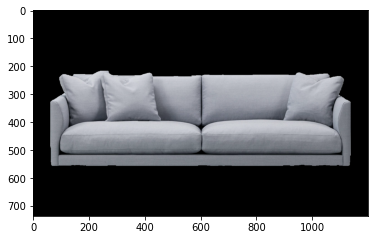

############## 3
# 1
655 379 470 169


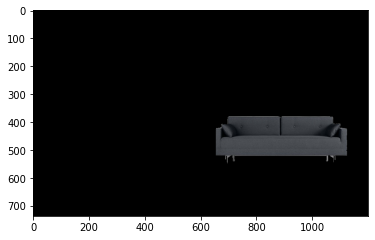

# 1
64 376 488 172


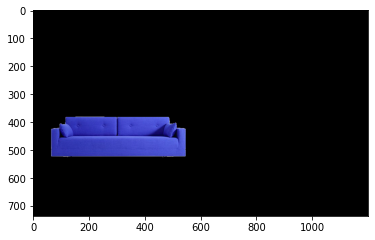

############## 4
# 1
113 28 999 386


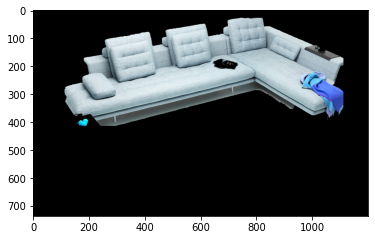

############## 5
# 1
0 182 1200 460


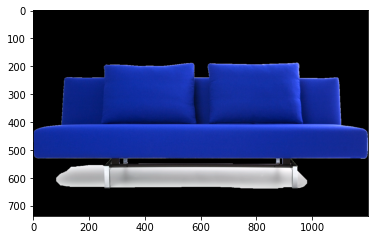

############## 6
############## 7
# 1
3 200 886 247


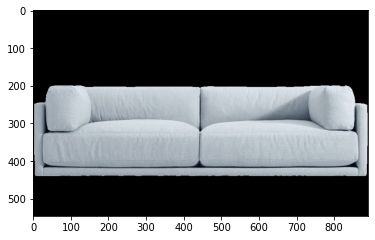

############## 8
# 1
42 186 1116 438


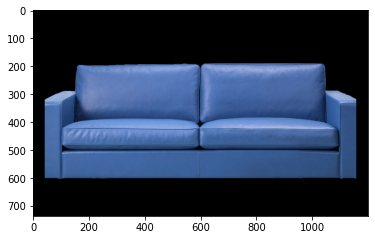

############## 9
# 1
41 214 1146 431


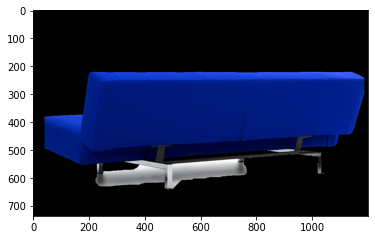

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
for i in range(1,10):
  print("##############",i)
  if i == 1 :
    path = '/content/yolov5/runs/detect/exp/labels/%d.txt'%i
  elif i==6 :
    continue
  else:
    path = '/content/yolov5/runs/detect/exp%d/labels/%d.txt'%(i,i)
  f = open(path, 'r')
  lines = f.readlines()
  src = cv2.imread(val_img_path[i-1], cv2.IMREAD_COLOR)
  # cv2_imshow(src)
  k=1
  # print(src.size)
  # print(src.shape[0])
  for line in lines:
      print("#",k)
      
      token = line.split(' ')
      x=float(token[1])
      y=float(token[2])
      w=float(token[3])
      h=float(token[4])

      x1=x-w/2
      # x2=x+w/2
      y1=y-h/2
      # y2=y+h/2
      

      x1_pixel = int(x1*src.shape[1])
      w_pixel = int(w*src.shape[1])
      y1_pixel = int(y1*src.shape[0])
      h_pixel = int(h*src.shape[0])
      
      print(x1_pixel,y1_pixel,w_pixel,h_pixel)
      rectangle = (x1_pixel,y1_pixel,w_pixel,h_pixel)
      # 초기 마스크 생성
      mask = np.zeros(src.shape[:2], np.uint8)

      #   grabCut에 사용할 임시 배열 생성
      bgdModel = np.zeros((1, 65), np.float64)
      fgdModel = np.zeros((1, 65), np.float64)

      # grabCut 실행
      cv2.grabCut(src, # 원본 이미지
            mask,       # 마스크
            rectangle,  # 사각형
            bgdModel,   # 배경을 위한 임시 배열
            fgdModel,   # 전경을 위한 임시 배열
            5,          # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

      #배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
      mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

      # 이미지에 새로운 마스크를 곱행 배경을 제외
      image_rgb_nobg = src * mask_2[:, :, np.newaxis]

      # plot
      plt.imshow(image_rgb_nobg)
      plt.show()
      
  f.close()